<h1>Analysis of Momentum strategy</h1>  
  
Nils DEPUILLE, Paul GAUTHIER

<h3>Step 0: import utilities and get data</h3>

In [153]:
# - - Imports - -

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [154]:
# - - Get the market data - -

df = pd.read_csv("crypto_prices_v2.csv")
df.rename(columns={'timestamp':'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df.head()

,unfi-busd,iota-usd,bhp-usdt,dot-usdt,aave-usdt,nmc-usdt,mx-usdt,dht-usdt,crv-usd,pha-usdt,...,api3-usdt,1inch-usdt,comp-usdt,ersdl-usdt,xor-usdt,ren-usdt,bid-usdt,mkr-usdt,prq-usdt,mta-usdt
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,5.562509,0.294552,0.664400,8.798804,87.590000,0.439790,0.1436,0.859310,0.637000,0.118509,...,1.801849,1.167545,144.668659,0.008365,102.525652,0.327979,0.013622,589.914791,0.527962,0.909049
2021-01-02,5.221067,0.286993,0.667342,8.760201,85.937751,0.459137,0.1452,0.992900,0.592534,0.117040,...,1.834821,1.090871,140.000168,0.008287,98.931513,0.312595,0.013083,597.494350,0.460791,1.011624
2021-01-03,6.482086,0.298317,0.667600,9.279673,87.968375,0.507415,0.1388,0.959000,0.621000,0.115557,...,1.889542,1.084320,145.591570,0.009397,101.388139,0.325757,0.014231,672.198175,0.507648,1.160168
2021-01-04,5.851341,0.317800,0.660000,9.465044,102.336182,0.521261,0.1384,1.057248,0.672000,0.114000,...,2.175675,1.076138,145.562839,0.012118,110.576618,0.329471,0.013833,678.422680,0.451232,1.165947
2021-01-05,5.751700,0.354807,0.652600,9.612824,114.077356,0.510710,0.1376,1.171523,0.680000,0.115772,...,2.388763,1.141967,155.225308,0.012469,115.365119,0.335810,0.012865,705.739433,0.608839,1.199186


In [155]:
# - - Get the momentum data - - 

momentum = pd.read_csv("momentum_daily.csv", sep=';', index_col=0, decimal=',', parse_dates=True, skiprows=13, skipfooter=2)
momentum.rename(columns={"Mom   ": "Mom"}, inplace=True)
momentum = momentum["Mom"].resample('D').ffill()
momentum = momentum[momentum.index.isin(df.index)]

momentum.head()

/tmp/ipykernel_9125/630522916.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  momentum = pd.read_csv("momentum_daily.csv", sep=';', index_col=0, decimal=',', parse_dates=True, skiprows=13, skipfooter=2)


2021-01-01   -0.59
2021-01-02   -0.59
2021-01-03   -0.59
2021-01-04   -0.04
2021-01-05   -0.71
Freq: D, Name: Mom, dtype: float64

In [156]:
# - - Get the factors data - - 

data_factors = pd.read_csv("data_factors.csv", sep=';', index_col=0, decimal=',', parse_dates=True, skiprows=4, skipfooter=2)
data_factors = data_factors.astype(float)
data_factors = data_factors.resample('D').ffill()
data_factors = data_factors[data_factors.index.isin(df.index)]

data_factors.head()

/tmp/ipykernel_9125/2671109762.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data_factors = pd.read_csv("data_factors.csv", sep=';', index_col=0, decimal=',', parse_dates=True, skiprows=4, skipfooter=2)


,Mkt-RF,SMB,HML,RF
2021-01-01,0.39,-0.89,0.41,0.0
2021-01-02,0.39,-0.89,0.41,0.0
2021-01-03,0.39,-0.89,0.41,0.0
2021-01-04,-1.41,0.22,0.58,0.0
2021-01-05,0.86,1.23,0.48,0.0


In [157]:
crix = pd.read_csv("crix.csv",sep=';', index_col=0, decimal=',', parse_dates=True)
r_crix = crix.pct_change().apply(lambda x : 100*x).resample('D').ffill()
r_crix = r_crix[r_crix.index.isin(df.index)].price

r_crix

/tmp/ipykernel_9125/2849000135.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  crix = pd.read_csv("crix.csv",sep=';', index_col=0, decimal=',', parse_dates=True)


date
2021-01-01     0.252287
2021-01-02     0.252287
2021-01-03     0.252287
2021-01-04    11.160252
2021-01-05     8.077017
                ...    
2022-12-28    -0.859082
2022-12-29    -0.165553
2022-12-30    -0.069753
2022-12-31    -0.069753
2023-01-01    -0.069753
Freq: D, Name: price, Length: 731, dtype: float64

In [158]:
r_crix-data_factors['RF']

2021-01-01     0.252287
2021-01-02     0.252287
2021-01-03     0.252287
2021-01-04    11.160252
2021-01-05     8.077017
                ...    
2022-12-28    -0.875082
2022-12-29    -0.181553
2022-12-30    -0.085753
2022-12-31          NaN
2023-01-01          NaN
Freq: D, Length: 731, dtype: float64

In [159]:
# - - Generate the rebalancing dates - -

rebalancing_dates = pd.date_range(start='2021-2-1', end = '2023-1-1', freq='MS')
rebalancing_dates

DatetimeIndex(['2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01',
               '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01',
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01',
               '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01',
               '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01'],
              dtype='datetime64[ns]', freq='MS')

<h3>Step 1: function to compute the portfolios according to the returns of the cryptocurrencies</h3>

In [160]:
# - - Compute the pairs to have in portfolio i at each rebalancing date - -

def getPortfolioCompo(i, market_data, rebalancing_dates, h):
    result = pd.DataFrame(columns=market_data.columns)

    for date in rebalancing_dates:
        date = pd.to_datetime(date,  format='%d/%m/%Y')

        price_date = market_data[market_data.index == str(date).split(" ")[0]]
        price_date_minus_h = market_data[market_data.index == str(date- pd.Timedelta(days=h)).split(' ')[0]]
        renta = price_date.iloc[0]/price_date_minus_h.iloc[0] -1
        
        renta.sort_values(ascending=False, inplace=True)

        pairs = [renta.index[i] for i in range (10*i, 10*(i+1), 1)]
        line = market_data.columns.map(lambda t : t in pairs)
        result.loc[date] = line
    return result

# Test
compos = getPortfolioCompo(0, df, rebalancing_dates, 15)
compos.head()

,unfi-busd,iota-usd,bhp-usdt,dot-usdt,aave-usdt,nmc-usdt,mx-usdt,dht-usdt,crv-usd,pha-usdt,...,api3-usdt,1inch-usdt,comp-usdt,ersdl-usdt,xor-usdt,ren-usdt,bid-usdt,mkr-usdt,prq-usdt,mta-usdt
2021-02-01,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
2021-03-01,True,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
2021-04-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2021-05-01,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,True,False,False
2021-06-01,False,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [161]:
for i in range(90):
    if compos.iloc[0,i] :
        print (compos.columns[i])


dht-usdt
fund-usdt
fti-usdt
doge-usdt
uni-usdt
xrp-usdt
pol-usdt
strong-usdt
gala-usdt
1inch-usdt


<h3>Step 2: construct the backtest strategy</h3>

In [162]:
# - - Compute the values of a portfolio - - 

def backtestPortfolios(V, pairs_sequence, market_data, rebalancing_dates, side="long"):

    # Instantiate the serie we return
    portfolio_values = pd.Series(dtype="float64")
        
    # Create the initial portfolio
    pf_compo = (V/pairs_sequence.iloc[0].sum())*pairs_sequence.iloc[0]
    
    reference_values = market_data.loc[rebalancing_dates[0]]
    
    Vt = V
    pf_null = False
        
    # Loop for each date
    for date in market_data.loc[rebalancing_dates[0]:].index:
        
        # Compute the value of the portfolio and append it to the serie
        rendements = market_data.loc[date]/reference_values - 1
        if side=="long":
            Vt = pf_compo.dot(1 + rendements)
        else:            
            rendements = rendements.map(lambda x: x if x<1 else 1) # to prevent shorts to switch to negativ values
            Vt = pf_compo.dot(1 - rendements)
            
        if Vt < 1E-6:
            pf_null = True
            
        portfolio_values[date] = 0 if pf_null else Vt
        
        # Rebalance the portfolio at each rebalancing dates
        if date in rebalancing_dates:
            pf_compo = (Vt/pairs_sequence.loc[date].sum())*pairs_sequence.loc[date]
            reference_values = market_data.loc[date]
            
    return portfolio_values
    

# Test
long = backtestPortfolios(1000, compos, df, rebalancing_dates, "long")
print("Long beginning:")
print(long.head())
print("Long end:")
print(long.tail(5))
short = backtestPortfolios(1000, compos, df, rebalancing_dates, "short")
print("Short beginning:")
print(short.head(5))
print("Short end:")
print(short.tail(5))

Long beginning:
2021-02-01    1000.000000
2021-02-02    1021.151367
2021-02-03    1083.026351
2021-02-04    1225.288870
2021-02-05    1258.068936
dtype: float64
Long end:
2022-12-28    2296.217045
2022-12-29    2268.904932
2022-12-30    2230.786296
2022-12-31    2355.445515
2023-01-01    2349.151645
dtype: float64
Short beginning:
2021-02-01    1000.000000
2021-02-02     978.848633
2021-02-03     916.973649
2021-02-04     814.702880
2021-02-05     779.582437
dtype: float64
Short end:
2022-12-28    267.910138
2022-12-29    270.119212
2022-12-30    273.202346
2022-12-31    263.119587
2023-01-01    263.628652
dtype: float64


Comparaison between all the portfolios from 1 to 9 and strategy 2 with an initial value of 1000$:

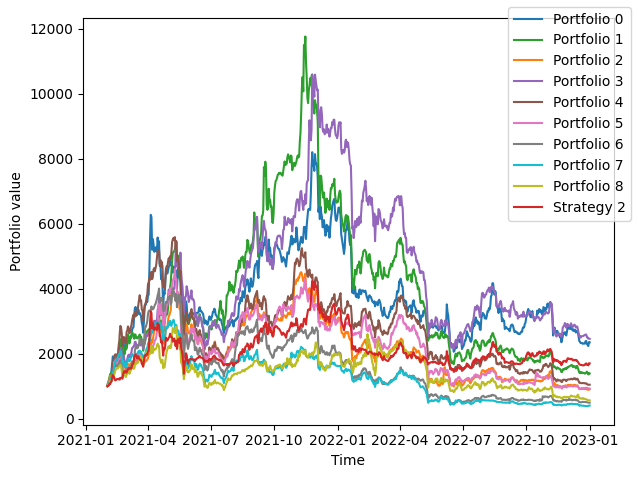

In [163]:
# - - Define a color palette with nine different colors - -

colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 
        'tab:brown', 'tab:pink', 'tab:gray', 'tab:cyan', 'tab:olive']


# - - Function to compute the portfolios values and returns and plot them - -

def getPfAndPlot(df, h=15):
    fig, ax = plt.subplots()

    values = pd.DataFrame()
    returns = pd.DataFrame()
    
    index_pf_max = df.shape[1]//10

    # Iterate over each portfolio and plot them
    for i in range(index_pf_max):
        color = colors[i % len(colors)]
        ax.set_xlabel('Time')
        ax.set_ylabel('Portfolio value')
        
        compos = getPortfolioCompo(i, df, rebalancing_dates, h)
        values[f"Portfolio_{i}"] = backtestPortfolios(1000, compos, df, rebalancing_dates)
        returns[f"Portfolio_{i}"] = values[f"Portfolio_{i}"].pct_change() * 100
        
        ax.plot(values.index, values[f"Portfolio_{i}"], color=color, label=f"Portfolio {i}")
        
    
    best_compos = getPortfolioCompo(0, df, rebalancing_dates, h)
    worst_compos = getPortfolioCompo(index_pf_max - 1, df, rebalancing_dates, h)
    values["Strategy 2"] = backtestPortfolios(500, best_compos, df, rebalancing_dates)
    values["Strategy 2"] += backtestPortfolios(500, worst_compos, df, rebalancing_dates, "short")
    returns["Strategy 2"] = values["Strategy 2"].pct_change() * 100
    
    ax.plot(values.index, values["Strategy 2"], color='tab:red', label="Strategy 2")

    fig.tight_layout()  
    fig.legend(loc='upper right')
    plt.show()
    
    return values, returns

values, returns = getPfAndPlot(df)

In [164]:
values.head()

,Portfolio_0,Portfolio_1,Portfolio_2,Portfolio_3,Portfolio_4,Portfolio_5,Portfolio_6,Portfolio_7,Portfolio_8,Strategy 2
2021-02-01,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
2021-02-02,1021.151367,1110.044448,1063.677661,1034.782536,1030.922215,1061.236640,1024.386385,1047.009965,1018.268795,1001.441286
2021-02-03,1083.026351,1155.966532,1123.420647,1075.368534,1056.105860,1089.407755,1048.043559,1103.665061,1063.194128,1009.916111
2021-02-04,1225.288870,1251.572029,1170.251189,1108.511963,1083.367566,1125.983383,1067.920170,1117.797929,1073.566782,1075.861044
2021-02-05,1258.068936,1352.548848,1311.984408,1192.209815,1170.130804,1202.040375,1146.298609,1158.315471,1141.758957,1058.154990


In [165]:
values.tail()

,Portfolio_0,Portfolio_1,Portfolio_2,Portfolio_3,Portfolio_4,Portfolio_5,Portfolio_6,Portfolio_7,Portfolio_8,Strategy 2
2022-12-28,2296.217045,1444.244685,895.193620,2498.641666,1060.338898,947.964561,501.945189,379.737972,588.099894,1653.394492
2022-12-29,2268.904932,1403.753089,896.786619,2502.966496,1049.990693,938.439317,495.760409,385.598629,563.843161,1656.365799
2022-12-30,2230.786296,1357.068230,884.185776,2457.530115,1037.740368,926.882357,490.749235,388.030305,562.247937,1638.399966
2022-12-31,2355.445515,1402.445789,888.661769,2460.639348,1042.375190,925.312955,491.308482,401.995906,560.780314,1701.735593
2023-01-01,2349.151645,1389.686469,903.989908,2455.373510,1042.151962,922.691944,488.795325,401.687348,560.789546,1698.582330


In [166]:
# - - Print mean returns of first, last, and strategy 2 portfolio - -
def print_returns(returns):
    print("Rendement moyen journalier portefeuille 1:")
    print(returns.iloc[:,0].mean(), "%")
    print("Rendement moyen journalier portefeuille", returns.shape[1]-1, ":")
    print(returns.iloc[:,-2].mean(), "%")
    print("Rendement moyen journalier de la stratégie 2:")
    print(returns.iloc[:,-1].mean(), "%")
    
print_returns(returns)

Rendement moyen journalier portefeuille 1:
0.24189755428441623 %
Rendement moyen journalier portefeuille 9 :
0.04598453186798272 %
Rendement moyen journalier de la stratégie 2:
0.15346239684076005 %


<h3> Statistical Description </h3>

array([[<Axes: title={'center': 'Portfolio_0'}>,
        <Axes: title={'center': 'Portfolio_1'}>,
        <Axes: title={'center': 'Portfolio_2'}>],
       [<Axes: title={'center': 'Portfolio_3'}>,
        <Axes: title={'center': 'Portfolio_4'}>,
        <Axes: title={'center': 'Portfolio_5'}>],
       [<Axes: title={'center': 'Portfolio_6'}>,
        <Axes: title={'center': 'Portfolio_7'}>,
        <Axes: title={'center': 'Portfolio_8'}>],
       [<Axes: title={'center': 'Strategy 2'}>, <Axes: >, <Axes: >]],
      dtype=object)

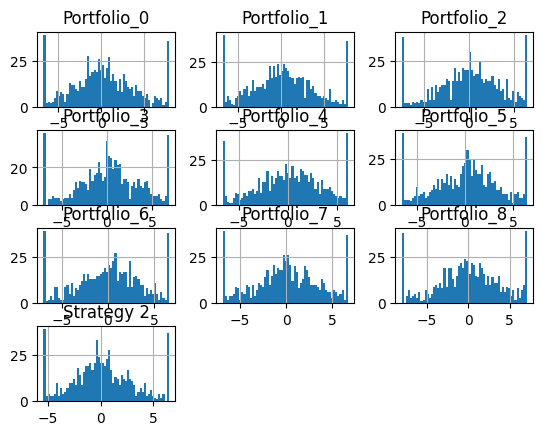

In [177]:
def winsorize_series(s):
    q = s.quantile([0.05, 0.95])
    if isinstance(q, pd.Series) and len(q) == 2:
        s[s < q.iloc[0]] = q.iloc[0]
        s[s > q.iloc[1]] = q.iloc[1]
    return s
# returns_winsorization = returns
returns.apply(winsorize_series)
returns.hist(bins=60)

In [170]:
# - - Compute statistical analysis values - -
def analysis(returns):
    return returns.mean(), returns.std(), returns.median(), returns.min(), returns.max(), returns.skew(), returns.kurtosis()

stat_analysis = returns.apply(analysis)
stat_analysis.index = ["Mean", "Std", "Median", "Min", "Max", "Skew", "Kurtosis"]
stat_analysis

,Portfolio_0,Portfolio_1,Portfolio_2,Portfolio_3,Portfolio_4,Portfolio_5,Portfolio_6,Portfolio_7,Portfolio_8,Strategy 2
Mean,0.217928,0.215466,0.096755,0.243106,0.123796,0.133755,0.054954,0.034372,0.048850,0.145198
Std,3.693064,3.726887,3.543945,3.505371,3.338474,3.371100,3.515658,3.537182,3.930190,2.955721
Median,0.044979,0.202078,0.133562,0.277601,0.261399,0.333129,0.227226,-0.002743,0.047152,-0.025065
Min,-6.748811,-6.795880,-7.481894,-7.020866,-6.656536,-6.570959,-6.957689,-6.846126,-8.014476,-5.447229
Max,7.835024,7.779869,6.477422,6.840503,6.116443,6.450551,6.578888,6.661147,7.102420,6.461167
Skew,0.155317,0.096361,-0.222267,-0.124037,-0.167810,-0.119785,-0.138834,-0.076208,-0.163582,0.194884
Kurtosis,-0.378560,-0.421388,-0.343129,-0.355644,-0.553520,-0.467100,-0.513966,-0.520211,-0.425845,-0.230819


<h3> Attentes : </h3>

On s'attends à ce que les portefeuilles soient triés dans l'ordre décroissant de rentabilités. Avec le portefeuille 0 ayant le plus de rentabilité. De plus, on s'attend à ce que les rentabilités moyennes soient positives.

Comme on travaille sur des cryptomonnaies, on s'attend à avoir une forte volatilité.

<h3> Résultats : </h3>

On peut voir que les moyennes de rendements ne sont pas triées. Ainsi on peut conclure que sur la période étudiée, en moyenne, ce ne sont pas les actifs ayant les mieux performés les 15 derniers jours qui vont le mieux performer dans le mois suivant.

On remarque que le portefeuille de la stratégie 2 (avec le portefeuille 0-8) possède une rentabilité plus petit que le portefeuille 0 mais possède une volatilité inférieure.

Au niveau du skew et kurtosis, on remarque qu'avec la winsorization on a des valeurs faibles. Ainsi notre distribution de rentabilité s'approche grandement d'un loi normale

La winsorization a permi de limiter les rentabilités à la baisse à -7.5% et à la haisse à 7.8%



<h2> Indicators </h2>

**Sharpe Ratio**

In [102]:
returns.dropna(inplace=True)
def sharpe(compo):
    return (compo.mean() - data_factors['RF'].mean()) / compo.std()
returns.apply(sharpe)

Portfolio_0    0.058256
Portfolio_1    0.057067
Portfolio_2    0.026516
Portfolio_3    0.068558
Portfolio_4    0.036247
Portfolio_5    0.038851
Portfolio_6    0.014839
Portfolio_7    0.008930
Portfolio_8    0.011721
Strategy 2     0.048182
dtype: float64

Nous avons calculé les ratios de Sharpe de nos portefeuilles 0 à 8 contenant les actifs par ordre de performance. 

<h4> Attentes : </h4>

On s'attend à des valeurs positives car on s'attend à un excès de rentabilité par rapport au taux sans risque. Mais a des valeurs faibles car la volatilité dans les cryptomonnaie est très importante ce qui a pour impact de diminuer le ratio.

La stratégie momentum est d'acheter les titres qui ont le plus performés ainsi on attend un ordre croissant entre les ratios de Sharpe avec le portefeuille 0 possédant le meilleur ratio de Sharpe et le 8 le pire. La stratégie 2 sevrait se placer assez haut dans le classement des ratios de Sharpe car le nombre d'actifs est doublé comparé aux autres portefeuilles ce qui a pour conséquence de diminuer la volatilité.

<h4> Résultats : </h4>

Les portefeuilles sont plus ou moins triés dans l'ordre décroissant des ratios de Sharpe avec des valeurs quasiment toutes positives. Néanmoins l'ordre n'est pas exact et on remarque notamment que le portefeuille 3 possède un ratio de Sharpe très élevé. 



**Security market line**

In [103]:

def SML(compo):
    serie_X = compo - data_factors['RF']
    serie_Y = data_factors['Mkt-RF']
    serie_Y = serie_Y[serie_Y.index.isin(serie_X.dropna().index)]

    X = sm.add_constant(serie_X.dropna())
    modele = sm.OLS(serie_Y.dropna(), X)
    resultats = modele.fit()
    return resultats.params["const"], resultats.params[0], resultats.pvalues['const'], resultats.pvalues[0], resultats.rsquared

SecurityMarketLine = returns.dropna().apply(SML)
SecurityMarketLine.index = ["Alpha Jensen", "Beta Portefeuille", "Pvalue Alpha", "Pvalue Beta", "R²"]
SecurityMarketLine

,Portfolio_0,Portfolio_1,Portfolio_2,Portfolio_3,Portfolio_4,Portfolio_5,Portfolio_6,Portfolio_7,Portfolio_8,Strategy 2
Alpha Jensen,-1.110868e-03,-1.093286e-03,1.044730e-02,-2.504059e-03,6.954888e-03,4.539782e-03,1.312005e-02,1.571429e-02,1.369482e-02,4.182914e-03
Beta Portefeuille,9.404200e-02,9.320773e-02,8.802584e-02,8.694252e-02,9.529773e-02,1.054837e-01,1.010130e-01,1.032372e-01,1.023841e-01,1.038237e-01
Pvalue Alpha,9.815484e-01,9.818387e-01,8.288116e-01,9.588062e-01,8.854417e-01,9.244914e-01,7.840449e-01,7.421604e-01,7.723154e-01,9.311324e-01
Pvalue Beta,1.198019e-12,1.122987e-12,1.906350e-10,5.011407e-10,8.020674e-11,3.019763e-13,3.256981e-13,6.778805e-14,1.048532e-16,3.962848e-10
R²,7.011911e-02,7.028905e-02,5.672935e-02,5.416221e-02,5.902515e-02,7.373487e-02,7.353674e-02,7.764237e-02,9.441387e-02,5.478612e-02


Alpha de Jensen : excès de rentabilité par rapport à la Sécurity Market Line. alpha > 0 : sur-performe, alpha < 0 : sous-performe

Beta : sensibilité du portefeuille au marché.

<h4>Attente : </h4> 

On s'attend tout d'abord à obtenir des valeurs de beta faible, car le marché des cryptomonnaies est décorrélé du marché traditionnel, mais les beta doivent tous être positifs car les actifs sont tous sensibles au marché.

On s'attend à avoir un alpha positif pour les premiers portefeuilles et pour le portefeuille 1-9 car on profite du fait que les actifs ayant bien performés dans le passé vont continuer de bien performer tandis que ceux qui ont mal performé continuent de mal performé et donc on s'attend à obtenir une rentabilité supérieur à celle attendue par le modèle. Tandis que pour les derniers portefeuilles, on s'attend à un alpha de jensen négatif pour les mêmes raisons.

On s'attend à avoir un R-squared faible car on applique des formules de la finance traditionnel dans le monde des cryptomonnaies, ainsi les formules ne s'appliquent pas à ce domaine.

<h4>Résultat : </h4> 

Nos alphas de Jensen possèdent des p-value tous égal à 10% (*), cela signifie que la valeur des alphas est assez significativement différent de zéro. Ainsi on va pouvoir interpréter les résultats des alphas : On remarque que les alphas sont tous positifs, cela signifie qu'ils sur-performent toujours le marché, quel que soit le portefeuille. 

Notre valeur du R-squared se situe entre 5% et 7% qui sont bien des valeurs faibles comme attendues.


**Treynor**

In [104]:
def treynor(compo, beta):
    return (compo.mean() - data_factors['RF'].mean()) / beta

returns.apply(lambda x: treynor(x, SecurityMarketLine.loc["Beta Portefeuille", x.name]))

Portfolio_0    2.287737
Portfolio_1    2.281802
Portfolio_2    1.067527
Portfolio_3    2.764137
Portfolio_4    1.269821
Portfolio_5    1.241616
Portfolio_6    0.516466
Portfolio_7    0.305965
Portfolio_8    0.449922
Strategy 2     1.371681
dtype: float64

Treynor : Excès de rentabilité par rapport à la sensibilité au marché
 
<h4>Attente : </h4> 

Comme nous avons des beta tous positifs, on s'attend à avoir des treynor positifs.

<h4>Résultat : </h4> 

Les treynors sont positifs comme attendues, on remarque que la stratégie 2 est descendu dans le classement car on ne tient plus compte de la volatilité.


**Fama & French**

In [105]:

def Fama_French(compo):
    serie_X = (compo - data_factors['RF']).dropna()
    serie_Y = data_factors['Mkt-RF']
    serie_Y = serie_Y[serie_Y.index.isin(serie_X.index)]
    serie_SMB = data_factors['SMB']
    serie_SMB = serie_SMB[serie_SMB.index.isin(serie_X.index)]
    serie_HML = data_factors['HML']
    serie_HML = serie_HML[serie_HML.index.isin(serie_X.index)]
    
    X = sm.add_constant(pd.DataFrame({'Market': serie_Y.dropna(), 'SMB': serie_SMB, 'HML': serie_HML}))
    modele = sm.OLS(serie_X.dropna(), X)
    resultats = modele.fit()

    return resultats.params['const'],resultats.params['Market'], resultats.params['SMB'], resultats.params['HML'], resultats.pvalues['const'],resultats.pvalues['Market'], resultats.pvalues['SMB'], resultats.pvalues['HML'], resultats.rsquared

FamaFrenchLine = returns.dropna().apply(Fama_French)
FamaFrenchLine.index = ["AlphaFamaFrench", "BetaPf", "BetaSMB", "BetaHML", "Pvalue F&F", "Pvalue Beta", "Pvalue SMB", "Pvalue HML", "R²"]
FamaFrenchLine

,Portfolio_0,Portfolio_1,Portfolio_2,Portfolio_3,Portfolio_4,Portfolio_5,Portfolio_6,Portfolio_7,Portfolio_8,Strategy 2
AlphaFamaFrench,1.884399e-01,1.819517e-01,7.508996e-02,2.142605e-01,1.083486e-01,1.200772e-01,3.639485e-02,1.978104e-03,2.791950e-02,1.224941e-01
BetaPf,7.462007e-01,7.877872e-01,6.593432e-01,6.773292e-01,6.172684e-01,7.069313e-01,7.463828e-01,8.001032e-01,9.357453e-01,5.246790e-01
BetaSMB,1.609439e-01,5.460660e-02,-3.810115e-02,-1.140655e-01,4.589751e-02,-1.120027e-01,-1.023400e-01,-1.821393e-01,-9.459025e-02,1.796685e-01
BetaHML,8.227433e-02,1.243077e-01,2.376987e-02,9.942043e-02,1.691227e-02,-3.329207e-02,1.708444e-03,4.708509e-02,-8.226484e-03,8.130959e-02
Pvalue F&F,1.664944e-01,1.859420e-01,5.689038e-01,1.008383e-01,3.824896e-01,3.339182e-01,7.788093e-01,9.878498e-01,8.454448e-01,2.648727e-01
Pvalue Beta,1.660106e-10,2.560680e-11,5.071831e-09,1.358117e-09,6.055649e-09,3.473801e-11,2.034351e-11,8.546537e-13,3.757526e-14,2.296368e-08
Pvalue SMB,4.224007e-01,7.875130e-01,8.444741e-01,5.529983e-01,8.017276e-01,5.407116e-01,5.920147e-01,3.414818e-01,6.540477e-01,2.670988e-01
Pvalue HML,5.381825e-01,3.572471e-01,8.542667e-01,4.377489e-01,8.895520e-01,7.849080e-01,9.892860e-01,7.120077e-01,9.533517e-01,4.508912e-01
R²,7.124059e-02,7.143006e-02,5.685808e-02,5.585469e-02,5.911994e-02,7.425862e-02,7.394867e-02,7.934291e-02,9.467957e-02,5.681392e-02


Fama&French : L'alpha de Jensen peut contenir des primes de risques non prises en compte. Pour cela on étudie l'alpha de Fama&French.

On va mettre une prime de risque sur le facteur taille et sur le facteur book to market.

<h4> Attentes : </h4> 

On s'attend à avoir un R-Squared faible car on étudie une formule de la finance traditionnelle sur des cryptomonnaies et car le modèle de Fama&French est un modèle empirique.

On s'attend à ce que le facteur BTM (HML) n'ait pas d'importance sur le modèle car les notions de valeurs comptables et de projet d'investissement n'est pas compatible avec le monde des cryptomonnaies. Ainsi on s'attend à une p-valeur elevée.

Pour le facteur SMB, on s'attend à une influence de ce facteur sur la rentabilité car le marché des cryptomonnaies est nouveau et donc les investisseurs ont plus tendance à investir dans des cryptomonnaies de grande capitalisation et donc que cela se retrouve dans les rentabilités.


<h4>Résultats : </h4> 

On remarque que les p-values pour l'alpha de Fama&French, pour le facteur SMB, pour le facteur HML sont tous non significatifs. Ainsi le modèle, avec les données du marché traditionnel, ne s'applique pas au monde des cryptomonnaies. Cela peut se comprendre car c'est un modèle empirique qui fonctionne sur le marché traditionnel mais qui n'est pas fondé sur des formules mais uniquement sur des observations de ce qu'il se passe sur le marché traditionnel. 

Ainsi les rentabilités de nos portefeuilles ne sont pas significativement expliquées par les facteurs BootToMarket et taille (SMB).

On peut quand même analyser le beta des portefeuilles qui sont significativement différents de 0 avec des valeurs du même ordre de grandeur que ceux du modèle de Jensen.

Le R-squared du modèle reste très faible comme attendu.


**Carhart**

In [106]:
def Carhart(compo):
    serie_X = (compo - data_factors['RF']).dropna()
    serie_Y = data_factors['Mkt-RF']
    serie_Y = serie_Y[serie_Y.index.isin(serie_X.index)]
    serie_SMB = data_factors['SMB']
    serie_SMB = serie_SMB[serie_SMB.index.isin(serie_X.index)]
    serie_HML = data_factors['HML']
    serie_HML = serie_HML[serie_HML.index.isin(serie_X.index)]
    serie_UMD = momentum[momentum.index.isin(serie_X.index)]

    X = sm.add_constant(pd.DataFrame({'Market': serie_Y.dropna(), 'SMB': serie_SMB, 'HML': serie_HML, 'UMD': serie_UMD}))
    modele = sm.OLS(serie_X.dropna(), X)
    resultats = modele.fit()

    return resultats.params['const'],resultats.params['Market'], resultats.params['SMB'], resultats.params['HML'], resultats.params['UMD'], resultats.pvalues['const'],resultats.pvalues['Market'], resultats.pvalues['SMB'], resultats.pvalues['HML'], resultats.pvalues['UMD'], resultats.rsquared

CarhartLine = returns.dropna().apply(Carhart)
CarhartLine.index = ["Alpha Carhart", "BetaPf", "SMB", "HML", "UMD", "Pvalue Carhart", "Pvalue Beta", "Pvalue SMB", "Pvalue HML", "Pvalue UMD", "R²"]
CarhartLine

,Portfolio_0,Portfolio_1,Portfolio_2,Portfolio_3,Portfolio_4,Portfolio_5,Portfolio_6,Portfolio_7,Portfolio_8,Strategy 2
Alpha Carhart,1.885441e-01,1.821951e-01,7.502397e-02,2.145827e-01,1.085084e-01,1.204282e-01,3.639183e-02,2.202627e-03,2.821122e-02,1.224460e-01
BetaPf,7.406990e-01,7.749329e-01,6.628288e-01,6.603111e-01,6.088275e-01,6.883939e-01,7.465425e-01,7.882442e-01,9.203370e-01,5.272185e-01
SMB,1.666527e-01,6.794447e-02,-4.171789e-02,-9.640715e-02,5.465590e-02,-9.276790e-02,-1.025056e-01,-1.698341e-01,-7.860231e-02,1.770334e-01
HML,9.910672e-02,1.636347e-01,1.310580e-02,1.514864e-01,4.273659e-02,2.342211e-02,1.219954e-03,8.336718e-02,3.891436e-02,7.354004e-02
UMD,-3.990684e-02,-9.323797e-02,2.528277e-02,-1.234399e-01,-6.122525e-02,-1.344601e-01,1.158130e-03,-8.601890e-02,-1.117632e-01,1.842032e-02
Pvalue Carhart,1.665353e-01,1.854926e-01,5.695108e-01,1.003020e-01,3.820298e-01,3.323509e-01,7.789833e-01,9.864754e-01,8.438782e-01,2.653947e-01
Pvalue Beta,3.495028e-10,8.295242e-11,6.228809e-09,4.872008e-09,1.382115e-08,1.634744e-10,3.319172e-11,3.043825e-12,1.675498e-13,2.812303e-08
Pvalue SMB,4.082151e-01,7.383763e-01,8.306742e-01,6.173595e-01,7.658947e-01,6.135895e-01,5.930823e-01,3.770321e-01,7.106846e-01,2.763196e-01
Pvalue HML,4.893176e-01,2.583788e-01,9.247682e-01,2.699909e-01,7.434745e-01,8.577625e-01,9.928666e-01,5.421149e-01,7.962955e-01,5.248823e-01
Pvalue UMD,7.440561e-01,4.500554e-01,8.308599e-01,2.918791e-01,5.825264e-01,2.278948e-01,9.920595e-01,4.608138e-01,3.847806e-01,8.518385e-01


Carhart : L'alpha de Carhart est une extension de l'alpha de Fama&French avec le facteur UMD (facteur de momentum) qui est ajouté.

<h4>Attentes : </h4> 

On s'attend toujours à avoir un R-Squared faible.

On s'attend à des valeurs de p-values pour le HML et le SMB similaire à ceux de Fama&French

Pour le facteur UMD, on s'attend à avoir des valeurs significatives car le facteur UMD prend en compte l'effet momentum qui est notre stratégie. On s'attend donc à avoir une p-value faible et des valeurs positives (pour montrer la corrélation positive avec le momentum).


<h4>Résultats : </h4> 

On remarque que les p-values pour l'alpha de Carhart, pour le facteur SMB, pour le facteur HML et pour le facteur UMD sont tous non significatifs différents de 0. Ainsi il n'est pas possible d'analyser les valeurs des Betas et de l'Alpha.

On peut interpréter cela par le fait que les valeurs de l'UMD extraites du marché traditionnel ne s'appliquent pas au marché des cryptomonnaies. Comparé à la précedente interprétation, nous pensons que la rentabilité est expliquée par le facteur UMD mais que néanmoins ce sont les valeurs proposées de l'UMD qui ne correspondent pas.

On peut quand même analyser le beta des portefeuilles qui sont significativement différents de 0 avec des valeurs du même ordre de grandeur que ceux du modèle de Jensen.

Le R-squared du modèle reste très faible comme attendu.


<h3>Compare results between CEX and DEX</h3>

In [107]:
exchanges = pd.read_csv("exchange_info_v2.csv")
exchanges.rename(columns={exchanges.columns[0]: 'Pair'}, inplace=True)
exchanges.set_index('Pair', inplace=True)
exchanges.head()

,CeX,DeX
Pair,,
unfi-busd,1,0
iota-usd,1,0
bhp-usdt,1,0
dot-usdt,1,0
aave-usdt,1,0


*CeX*

In [108]:
cex_data = df * exchanges.CeX
cex_data = cex_data[cex_data.columns[(cex_data != 0).any()]]
cex_data.head()

,unfi-busd,iota-usd,bhp-usdt,dot-usdt,aave-usdt,nmc-usdt,mx-usdt,dht-usdt,crv-usd,pha-usdt,...,gala-usdt,api3-usdt,1inch-usdt,comp-usdt,ersdl-usdt,xor-usdt,ren-usdt,mkr-usdt,prq-usdt,mta-usdt
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,5.562509,0.294552,0.664400,8.798804,87.590000,0.439790,0.1436,0.859310,0.637000,0.118509,...,0.001185,1.801849,1.167545,144.668659,0.008365,102.525652,0.327979,589.914791,0.527962,0.909049
2021-01-02,5.221067,0.286993,0.667342,8.760201,85.937751,0.459137,0.1452,0.992900,0.592534,0.117040,...,0.001151,1.834821,1.090871,140.000168,0.008287,98.931513,0.312595,597.494350,0.460791,1.011624
2021-01-03,6.482086,0.298317,0.667600,9.279673,87.968375,0.507415,0.1388,0.959000,0.621000,0.115557,...,0.001182,1.889542,1.084320,145.591570,0.009397,101.388139,0.325757,672.198175,0.507648,1.160168
2021-01-04,5.851341,0.317800,0.660000,9.465044,102.336182,0.521261,0.1384,1.057248,0.672000,0.114000,...,0.001310,2.175675,1.076138,145.562839,0.012118,110.576618,0.329471,678.422680,0.451232,1.165947
2021-01-05,5.751700,0.354807,0.652600,9.612824,114.077356,0.510710,0.1376,1.171523,0.680000,0.115772,...,0.001525,2.388763,1.141967,155.225308,0.012469,115.365119,0.335810,705.739433,0.608839,1.199186


*Dex*

In [109]:
dex_data = df * exchanges.DeX
dex_data = dex_data[dex_data.columns[(dex_data != 0).any()]]
dex_data.head()

,pha-usdt,link-usdt,sushi-usdt,doge-usdt,tusd-usdc,uni-usdt,matic-usdt,crv-usdt,wbtc-usdt,busd-usdt,...,api3-usdt,1inch-usdt,comp-usdt,ersdl-usdt,xor-usdt,ren-usdt,bid-usdt,mkr-usdt,prq-usdt,mta-usdt
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,0.118509,11.807370,3.002082,0.004965,1.000620,4.949158,0.01792,0.633522,29223.600000,0.997900,...,1.801849,1.167545,144.668659,0.008365,102.525652,0.327979,0.013622,589.914791,0.527962,0.909049
2021-01-02,0.117040,11.795843,3.184169,0.007596,0.999894,4.745642,0.01854,0.590000,30903.834092,0.998100,...,1.834821,1.090871,140.000168,0.008287,98.931513,0.312595,0.013083,597.494350,0.460791,1.011624
2021-01-03,0.115557,12.713247,3.240983,0.011324,1.005174,5.103375,0.01955,0.618000,33651.688829,0.999000,...,1.889542,1.084320,145.591570,0.009397,101.388139,0.325757,0.014231,672.198175,0.507648,1.160168
2021-01-04,0.114000,13.631584,3.592509,0.009637,1.000270,5.405089,0.02180,0.646654,31639.231454,0.999200,...,2.175675,1.076138,145.562839,0.012118,110.576618,0.329471,0.013833,678.422680,0.451232,1.165947
2021-01-05,0.115772,14.200185,3.545546,0.009545,0.999517,5.779328,0.02474,0.676276,32237.802160,0.998973,...,2.388763,1.141967,155.225308,0.012469,115.365119,0.335810,0.012865,705.739433,0.608839,1.199186


**Remarque:**  
On a bien plus de cryptomonnaies présentes sur les échanges centralisés que décentralisés.


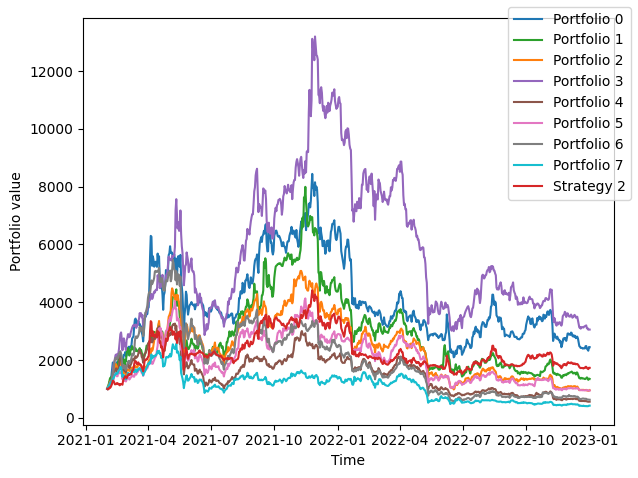

In [110]:
values_cex, returns_cex = getPfAndPlot(cex_data)

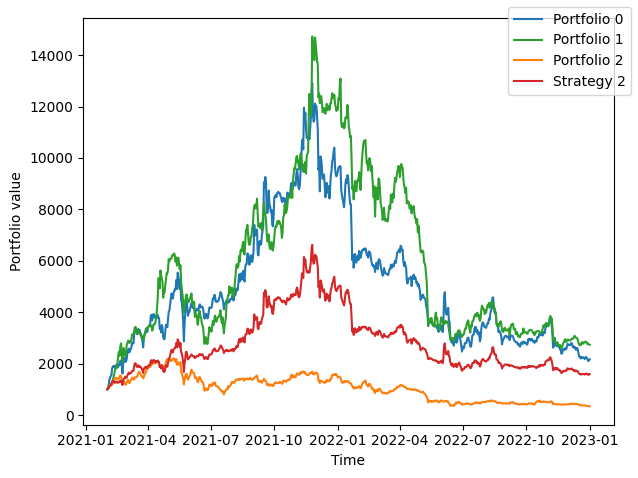

In [111]:
values_dex, returns_dex = getPfAndPlot(dex_data)

*CeX* **Returns**

In [112]:
print_returns(returns_cex)

Rendement moyen journalier portefeuille 1:
0.24546971884295649 %
Rendement moyen journalier portefeuille 8 :
-0.02404682591450176 %
Rendement moyen journalier de la stratégie 2:
0.1530875448069844 %


*DeX* **Returns**

In [113]:
print_returns(returns_dex)

Rendement moyen journalier portefeuille 1:
0.22886867381417828 %
Rendement moyen journalier portefeuille 3 :
-0.05886606654660856 %
Rendement moyen journalier de la stratégie 2:
0.141549450184806 %


<h4>Attentes :</h4>

Vu qu'on a moins de cryptomonnaies sur les DeX, on s'attend à ce que le portefeuilles soient moins polarisés.

<h4>Résultats :</h4>

Les meilleurs et pires portefeuilles ont des rendements plus ou moins identiques entre Cex et Dex.

*CeX* **Statistical Analysis**

In [114]:
stat_analysis_cex = returns_cex.apply(analysis)
stat_analysis_cex.index = ["Mean", "Std", "Median", "Min", "Max", "Skew", "Kurtosis"]
stat_analysis_cex

,Portfolio_0,Portfolio_1,Portfolio_2,Portfolio_3,Portfolio_4,Portfolio_5,Portfolio_6,Portfolio_7,Strategy 2
Mean,0.245470,0.157294,0.089245,0.256426,-0.000595,0.089638,0.043714,-0.024047,0.153088
Std,4.867411,4.788452,4.338131,4.401582,4.030750,4.395802,4.684998,4.425315,3.879625
Median,0.106423,0.182473,0.208725,0.308203,0.152337,0.343200,0.056296,-0.009187,0.010879
Min,-23.544540,-23.399132,-20.841377,-17.765049,-19.852385,-25.051523,-23.327958,-26.501637,-19.740344
Max,27.904043,23.331652,15.872596,21.609209,13.330437,21.050352,20.428440,17.749488,22.420180
Skew,0.375863,0.019105,-0.607868,0.129952,-0.665283,-0.344587,-0.232525,-0.596655,0.376381
Kurtosis,4.736424,3.165034,3.294713,3.069216,2.813688,4.330317,3.978384,4.272192,5.747125


*DeX* **Statistical Analysis**

In [115]:
stat_analysis_dex = returns_dex.apply(analysis)
stat_analysis_dex.index = ["Mean", "Std", "Median", "Min", "Max", "Skew", "Kurtosis"]
stat_analysis_dex

,Portfolio_0,Portfolio_1,Portfolio_2,Strategy 2
Mean,0.228869,0.243225,-0.058866,0.141549
Std,4.894946,4.457411,4.306204,3.895903
Median,0.108378,0.180356,-0.090174,-0.007032
Min,-20.788782,-20.573252,-21.955205,-17.631911
Max,24.847256,19.290609,16.369290,21.844142
Skew,0.502539,0.114436,-0.382851,0.519158
Kurtosis,4.458731,2.781449,2.892153,5.294935


*Cex* **Sharpe**

In [116]:
returns_cex.dropna()
returns_cex.apply(sharpe)

Portfolio_0    0.049859
Portfolio_1    0.032267
Portfolio_2    0.019930
Portfolio_3    0.057625
Portfolio_4   -0.000839
Portfolio_5    0.019758
Portfolio_6    0.008736
Portfolio_7   -0.006063
Strategy 2     0.038742
dtype: float64

*Dex* **Sharpe**

In [117]:
returns_dex.dropna()
returns_dex.apply(sharpe)

Portfolio_0    0.046187
Portfolio_1    0.053942
Portfolio_2   -0.014317
Strategy 2     0.035618
dtype: float64

*Cex* **Security Market Line**

In [118]:
SecurityMarketLine_cex = returns_cex.dropna().apply(SML)
SecurityMarketLine_cex.index = ["Alpha Jensen", "Beta Portefeuille", "Pvalue Alpha", "Pvalue Beta", "R²"]
SecurityMarketLine_cex

,Portfolio_0,Portfolio_1,Portfolio_2,Portfolio_3,Portfolio_4,Portfolio_5,Portfolio_6,Portfolio_7,Strategy 2
Alpha Jensen,2.035399e-03,9.410011e-03,1.265161e-02,2.272850e-03,1.874565e-02,1.214544e-02,1.539111e-02,2.089709e-02,7.085440e-03
Beta Portefeuille,6.966547e-02,5.973599e-02,6.954112e-02,6.368529e-02,7.139629e-02,7.303074e-02,7.264182e-02,7.448443e-02,7.743844e-02
Pvalue Alpha,9.662429e-01,8.463349e-01,7.938030e-01,9.627447e-01,6.992272e-01,8.011539e-01,7.486102e-01,6.642020e-01,8.837079e-01
Pvalue Beta,4.028190e-12,5.725883e-09,7.594351e-10,1.147536e-08,4.545987e-09,5.361784e-11,3.205240e-12,1.612598e-11,9.043406e-10
R²,6.692863e-02,4.767496e-02,5.305685e-02,4.581940e-02,4.829048e-02,6.009187e-02,6.753051e-02,6.326939e-02,5.259227e-02


*Dex* **Security Market Line**

In [119]:
SecurityMarketLine_dex = returns_dex.dropna().apply(SML)
SecurityMarketLine_dex.index = ["Alpha Jensen", "Beta Portefeuille", "Pvalue Alpha", "Pvalue Beta", "R²"]
SecurityMarketLine_dex

,Portfolio_0,Portfolio_1,Portfolio_2,Strategy 2
Alpha Jensen,5.131757e-03,1.798345e-03,2.347637e-02,9.415370e-03
Beta Portefeuille,5.998161e-02,6.895345e-02,8.159998e-02,6.649104e-02
Pvalue Alpha,9.157605e-01,9.703686e-01,6.241763e-01,8.469424e-01
Pvalue Beta,2.181264e-09,3.544135e-10,5.889566e-13,1.406307e-07
R²,5.024802e-02,5.508281e-02,7.198353e-02,3.911935e-02


*Cex* **Treynor**

In [120]:
returns_cex.apply(lambda x: treynor(x, SecurityMarketLine_cex.loc["Beta Portefeuille", x.name]))

Portfolio_0    3.483578
Portfolio_1    2.586537
Portfolio_2    1.243304
Portfolio_3    3.982726
Portfolio_4   -0.047343
Portfolio_5    1.189266
Portfolio_6    0.563439
Portfolio_7   -0.360229
Strategy 2     1.940934
dtype: float64

*Dex* **Treynor**

In [121]:
returns_dex.apply(lambda x: treynor(x, SecurityMarketLine_dex.loc["Beta Portefeuille", x.name]))

Portfolio_0    3.769223
Portfolio_1    3.486995
Portfolio_2   -0.755523
Strategy 2     2.086970
dtype: float64

*Cex* **Fama & French**

In [122]:
FamaFrenchLine_cex = returns_cex.dropna().apply(Fama_French)
FamaFrenchLine_cex.index = ["AlphaFamaFrench", "BetaPf", "SMB", "HML", "Pvalue F&F", "Pvalue Beta", "Pvalue SMB", "Pvalue HML", "R²"]
FamaFrenchLine_cex

,Portfolio_0,Portfolio_1,Portfolio_2,Portfolio_3,Portfolio_4,Portfolio_5,Portfolio_6,Portfolio_7,Strategy 2
AlphaFamaFrench,2.087155e-01,1.234863e-01,6.476083e-02,2.405718e-01,-2.075954e-02,7.095466e-02,1.872945e-02,-5.470494e-02,1.293275e-01
BetaPf,9.504026e-01,8.256072e-01,7.933147e-01,7.065031e-01,6.915054e-01,8.383541e-01,9.622567e-01,8.798254e-01,6.669180e-01
SMB,3.686932e-01,9.754994e-02,-1.778095e-01,1.368707e-01,-3.468797e-02,-1.520813e-01,-1.524150e-01,-1.312035e-01,2.651909e-01
HML,1.549187e-01,1.280659e-01,-1.618678e-03,3.120812e-02,2.620510e-02,-3.144878e-02,1.760938e-02,2.182206e-02,9.756659e-02
Pvalue F&F,2.454848e-01,4.899493e-01,6.886188e-01,1.442627e-01,8.903601e-01,6.636967e-01,9.138926e-01,7.385469e-01,3.705896e-01
Pvalue Beta,6.706802e-10,6.534983e-08,9.570210e-09,4.909029e-07,7.655450e-08,1.988421e-09,9.651448e-11,3.834400e-10,6.452878e-08
Pvalue SMB,1.639468e-01,7.112726e-01,4.553427e-01,5.726898e-01,8.757901e-01,5.271316e-01,5.504709e-01,5.869857e-01,2.129187e-01
Pvalue HML,3.798714e-01,4.658817e-01,9.918604e-01,8.469170e-01,8.593357e-01,8.443843e-01,9.175342e-01,8.921311e-01,4.914333e-01
R²,6.996349e-02,4.846284e-02,5.385857e-02,4.626295e-02,4.839080e-02,6.063766e-02,6.809562e-02,6.376816e-02,5.493602e-02


*Dex* **Fama & French**

In [123]:
FamaFrenchLine_dex = returns_dex.dropna().apply(Fama_French)
FamaFrenchLine_dex.index = ["AlphaFamaFrench", "BetaPf", "SMB", "HML", "Pvalue F&F", "Pvalue Beta", "Pvalue SMB", "Pvalue HML", "R²"]
FamaFrenchLine_dex

,Portfolio_0,Portfolio_1,Portfolio_2,Strategy 2
AlphaFamaFrench,1.970592e-01,2.148699e-01,-7.913413e-02,0.122168
BetaPf,8.299798e-01,8.521336e-01,8.982284e-01,0.573159
SMB,3.525096e-01,-2.000593e-01,-1.270066e-01,0.236498
HML,1.542095e-01,5.328000e-02,-1.730145e-02,0.074706
Pvalue F&F,2.801922e-01,1.953552e-01,6.183582e-01,0.403213
Pvalue Beta,9.964006e-08,1.980198e-09,4.547251e-11,0.000004
Pvalue SMB,1.899771e-01,4.130961e-01,5.874227e-01,0.272248
Pvalue HML,3.893464e-01,7.435159e-01,9.116646e-01,0.602599
R²,5.303998e-02,5.638718e-02,7.237837e-02,0.040890


*CeX* **Carhart**

In [124]:

CarhartLine_cex = returns_cex.dropna().apply(Carhart)
CarhartLine_cex.index = ["Alpha Carhart", "BetaPf", "SMB", "HML", "UMD", "Pvalue Carhart", "Pvalue Beta", "Pvalue SMB", "Pvalue HML", "Pvalue UMD", "R²"]
CarhartLine_cex

,Portfolio_0,Portfolio_1,Portfolio_2,Portfolio_3,Portfolio_4,Portfolio_5,Portfolio_6,Portfolio_7,Strategy 2
Alpha Carhart,2.086563e-01,1.234159e-01,6.463503e-02,2.406475e-01,-2.069576e-02,7.105565e-02,1.852073e-02,-5.449082e-02,1.290880e-01
BetaPf,9.535258e-01,8.293244e-01,7.999591e-01,7.025055e-01,6.881369e-01,8.330197e-01,9.732808e-01,8.685158e-01,6.795700e-01
SMB,3.654524e-01,9.369295e-02,-1.847039e-01,1.410187e-01,-3.119269e-02,-1.465462e-01,-1.638538e-01,-1.194684e-01,2.520629e-01
HML,1.453633e-01,1.166935e-01,-2.194698e-02,4.343865e-02,3.651100e-02,-1.512839e-02,-1.611837e-02,5.642313e-02,5.885838e-02
UMD,2.265429e-02,2.696223e-02,4.819509e-02,-2.899657e-02,-2.443361e-02,-3.869297e-02,7.996300e-02,-8.203350e-02,9.177086e-02
Pvalue Carhart,2.459542e-01,4.905024e-01,6.893821e-01,1.444166e-01,8.907710e-01,6.634608e-01,9.148938e-01,7.396586e-01,3.716498e-01
Pvalue Beta,9.084384e-10,7.982334e-08,1.053673e-08,7.550338e-07,1.220095e-07,3.717544e-09,9.555215e-11,9.605553e-10,5.113362e-08
Pvalue SMB,1.695879e-01,7.233961e-01,4.400847e-01,5.628650e-01,8.887152e-01,5.440673e-01,5.227644e-01,6.223509e-01,2.383607e-01
Pvalue HML,4.422971e-01,5.355454e-01,8.973759e-01,8.021636e-01,8.179165e-01,9.298405e-01,9.295727e-01,7.436795e-01,6.986186e-01
Pvalue UMD,8.883191e-01,8.666811e-01,7.398175e-01,8.445232e-01,8.566359e-01,7.917472e-01,6.071958e-01,5.772547e-01,4.790823e-01


*DeX* **Carhart**

In [125]:
CarhartLine_dex = returns_dex.dropna().apply(Carhart)
CarhartLine_dex.index = ["Alpha Carhart", "BetaPf", "SMB", "HML", "UMD", "Pvalue Carhart", "Pvalue Beta", "Pvalue SMB", "Pvalue HML", "Pvalue UMD", "R²"]
CarhartLine_dex

,Portfolio_0,Portfolio_1,Portfolio_2,Strategy 2
Alpha Carhart,1.972615e-01,2.153057e-01,-7.902180e-02,0.122088
BetaPf,8.192951e-01,8.291151e-01,8.922957e-01,0.577396
SMB,3.635963e-01,-1.761748e-01,-1.208507e-01,0.232101
HML,1.868988e-01,1.237041e-01,8.495910e-04,0.061742
UMD,-7.750098e-02,-1.669641e-01,-4.303316e-02,0.030735
Pvalue Carhart,2.799702e-01,1.943700e-01,6.190878e-01,0.403844
Pvalue Beta,1.962525e-07,7.373317e-09,9.690405e-11,0.000004
Pvalue SMB,1.783140e-01,4.726351e-01,6.072548e-01,0.283401
Pvalue HML,3.306417e-01,4.784081e-01,9.959470e-01,0.688235
Pvalue UMD,6.361173e-01,2.620513e-01,7.628915e-01,0.814815


<h4>Attentes :</h4>

On ne s'attend pas à ce qu'il y ait de différences entre Cex et Dex sur les descripteurs statistiques, ainsi que sur les différents indicateurs, étant donné qu'on arrive à construire des portefeuilles qui ont des valeurs similaires entre les deux types de plateforme d'échange.

<h4>Résultats :</h4>

Les descripteurs statistiques sont vraisemblablement similaires, ainsi que la plupart des indiacateurs. Cependant, on voit que pour chaque portefeuille constitué sur Dex (à part la stratégie 2 car il y une partie du portefeuille qui est short), le facteur UMD est négatif, mais pas toujours lorsque le portefeuille est contitué sur Cex. Avoir un facteur UMD négatif pour une stratégie momentum est pour le moins perturbant. 


<h2>CRIX index</h2>

Tout ce qu'on a fait jusque là au niveau des indicateurs était vis-à-vis du rendement de marché traditionnel. On va désormais utilisé l'indice CRIX pour remplacer ce rendement. Il s'agit d'un indice basé sur environ une douzaine de cryptomonnaies: celles avec les plus grandes capitalisations. De plus, la part des différentes cryptomonnaies dans l'indice est pondérée par leur capitalisation.

<h4>Attentes : </h4> 

On s'attend:
- à ce que le beta des portefeuilles soient désormais bien plus grands car nos portefeuilles sont bien plus corrélés avec le marché des cryptomonnaies qu'avec le marché traditionnel.  
- à ce que les R-squared des modèles soient plus importants qu'avec l'indice strandard de marché.
- à avoir des alphas de Jensen positifs pour les meilleurs portefeuilles et négatifs pour les moins bons.
- à avoir des ratio de Sharpe et de Treynor qui soient ordonnées selon la rentabilité des portefeuilles.


In [126]:
def SML_Crix(compo):
    serie_X = compo - data_factors['RF']
    serie_Y = r_crix-data_factors['RF']
    serie_Y = serie_Y[serie_Y.index.isin(serie_X.dropna().index)]
    X = sm.add_constant(serie_X.dropna())
    modele = sm.OLS(serie_Y.dropna(), X)
    resultats = modele.fit()
    return resultats.params["const"], resultats.params[0], resultats.pvalues['const'], resultats.pvalues[0], resultats.rsquared

SecurityMarketLine_Crix = returns.dropna().apply(SML_Crix)
SecurityMarketLine_Crix.index = ["Alpha Jensen", "Beta Portefeuille", "Pvalue Alpha", "Pvalue Beta", "R²"]
SecurityMarketLine_Crix

,Portfolio_0,Portfolio_1,Portfolio_2,Portfolio_3,Portfolio_4,Portfolio_5,Portfolio_6,Portfolio_7,Portfolio_8,Strategy 2
Alpha Jensen,-2.264689e-01,-2.364757e-01,-1.702910e-01,-2.711451e-01,-1.999881e-01,-2.043399e-01,-1.451058e-01,-1.257827e-01,-1.354519e-01,-1.949104e-01
Beta Portefeuille,5.716213e-01,6.147841e-01,6.898823e-01,6.786982e-01,7.661574e-01,7.338139e-01,7.113520e-01,6.872478e-01,6.003117e-01,6.355828e-01
Pvalue Alpha,1.239456e-01,9.872819e-02,2.213306e-01,5.493188e-02,1.424318e-01,1.403574e-01,2.921212e-01,3.674146e-01,3.376927e-01,1.984403e-01
Pvalue Beta,3.461799e-41,1.552858e-49,1.424702e-57,4.693156e-54,4.161146e-64,3.321539e-59,9.537149e-61,9.938582e-57,5.042897e-53,4.136657e-32
R²,2.290554e-01,2.703709e-01,3.080835e-01,2.918209e-01,3.373175e-01,3.155040e-01,3.224409e-01,3.042175e-01,2.869823e-01,1.815320e-01


<h4>Résultats :</h4>

On obtient des p-values des alphas trop importantes pour pouvoir anaylser les valeurs des alphas. Cela peut venir du fait que l'alpha de Jensen contient des primes de risque qu'il faut ajouter au modèle pour déterminer réellement l'excès de rentabilité.

In [127]:

def Fama_French_Crix(compo):
    serie_X = (compo - data_factors['RF']).dropna()
    serie_Y = r_crix-data_factors['RF']
    serie_Y = serie_Y[serie_Y.index.isin(serie_X.index)]
    serie_SMB = data_factors['SMB']
    serie_SMB = serie_SMB[serie_SMB.index.isin(serie_X.index)]
    serie_HML = data_factors['HML']
    serie_HML = serie_HML[serie_HML.index.isin(serie_X.index)]
    
    X = sm.add_constant(pd.DataFrame({'Market': serie_Y.dropna(), 'SMB': serie_SMB, 'HML': serie_HML}))
    modele = sm.OLS(serie_X.dropna(), X)
    resultats = modele.fit()

    return resultats.params['const'],resultats.params['Market'], resultats.params['SMB'], resultats.params['HML'], resultats.pvalues['const'],resultats.pvalues['Market'], resultats.pvalues['SMB'], resultats.pvalues['HML'], resultats.rsquared

FamaFrenchLine = returns.dropna().apply(Fama_French_Crix)
FamaFrenchLine.index = ["AlphaFamaFrench", "BetaPf", "SMB", "HML", "Pvalue F&F", "Pvalue Beta", "Pvalue SMB", "Pvalue HML", "R²"]
FamaFrenchLine

,Portfolio_0,Portfolio_1,Portfolio_2,Portfolio_3,Portfolio_4,Portfolio_5,Portfolio_6,Portfolio_7,Portfolio_8,Strategy 2
AlphaFamaFrench,2.460455e-01,2.430114e-01,1.270155e-01,2.673674e-01,1.571647e-01,1.752190e-01,9.462317e-02,6.398898e-02,9.993795e-02,1.630296e-01
BetaPf,4.017321e-01,4.485837e-01,4.579052e-01,4.467956e-01,4.491806e-01,4.375938e-01,4.629422e-01,4.552573e-01,4.817125e-01,2.855877e-01
SMB,6.475316e-02,-6.926337e-02,-2.170071e-01,-2.763197e-01,-1.402911e-01,-2.551378e-01,-2.543094e-01,-3.076362e-01,-1.950841e-01,1.091904e-01
HML,5.750131e-02,1.141538e-01,6.920447e-02,1.306585e-01,7.285274e-02,-1.947864e-02,1.689953e-02,3.655049e-02,-5.372349e-02,6.592903e-02
Pvalue F&F,4.709680e-02,4.581061e-02,2.588528e-01,1.747842e-02,1.301291e-01,9.996817e-02,3.915062e-01,5.690473e-01,4.305916e-01,1.104797e-01
Pvalue Beta,7.063262e-39,3.078932e-48,1.150288e-56,1.419043e-54,1.543346e-62,1.442508e-57,2.053956e-59,3.337691e-56,1.352595e-50,3.665168e-30
Pvalue SMB,7.200137e-01,6.961775e-01,1.864052e-01,9.213895e-02,3.544269e-01,1.008176e-01,1.148772e-01,6.102461e-02,2.919733e-01,4.636691e-01
Pvalue HML,6.212944e-01,3.179952e-01,5.129054e-01,2.162076e-01,4.553786e-01,8.456829e-01,8.707044e-01,7.294334e-01,6.522939e-01,4.922141e-01
R²,2.293813e-01,2.719686e-01,3.110268e-01,2.980783e-01,3.392344e-01,3.182550e-01,3.252982e-01,3.086317e-01,2.881455e-01,1.824498e-01


On a ajouté les primes de risque sur les attributs SMB et HML.

<h4> Résultats : </h4>

On remarque que même si les p-values des beta du SMB et HML ne sont pas significativement différentes de 0, la p-value de l'alpha de Fama&French elle l'est. Ainsi on peut dire que : 
- Il y a bien une prime de risque qui est représentée par SMB ou/et HML.
- Mais que cette prime de risque est calculée sur des mauvaises données.

Ainsi on va pouvoir analyser les valeurs des alphas :
On a des valeurs toutes positives comme attendue. Néanmoins les portefeuilles ne sont pas triés selon un ordre décroissant des valeurs des alphas. Il y a une légére incohérence avec le Portfolio_3 qui possède un excès de rendement supérieur au premier.

In [128]:
def Carhart_Crix(compo):
    serie_X = (compo - data_factors['RF']).dropna()
    serie_Y = r_crix-data_factors['RF']
    serie_Y = serie_Y[serie_Y.index.isin(serie_X.index)]
    serie_SMB = data_factors['SMB']
    serie_SMB = serie_SMB[serie_SMB.index.isin(serie_X.index)]
    serie_HML = data_factors['HML']
    serie_HML = serie_HML[serie_HML.index.isin(serie_X.index)]
    serie_UMD = momentum[momentum.index.isin(serie_X.index)]

    X = sm.add_constant(pd.DataFrame({'Market': serie_Y.dropna(), 'SMB': serie_SMB, 'HML': serie_HML, 'UMD': serie_UMD}))
    modele = sm.OLS(serie_X.dropna(), X)
    resultats = modele.fit()

    return resultats.params['const'],resultats.params['Market'], resultats.params['SMB'], resultats.params['HML'], resultats.params['UMD'], resultats.pvalues['const'],resultats.pvalues['Market'], resultats.pvalues['SMB'], resultats.pvalues['HML'], resultats.pvalues['UMD'], resultats.rsquared

CarhartLine = returns.dropna().apply(Carhart_Crix)
CarhartLine.index = ["Alpha Carhart", "BetaPf", "SMB", "HML", "UMD", "Pvalue Carhart", "Pvalue Beta", "Pvalue SMB", "Pvalue HML", "Pvalue UMD", "R²"]
CarhartLine

,Portfolio_0,Portfolio_1,Portfolio_2,Portfolio_3,Portfolio_4,Portfolio_5,Portfolio_6,Portfolio_7,Portfolio_8,Strategy 2
Alpha Carhart,2.456571e-01,2.422721e-01,1.273103e-01,2.665290e-01,1.568560e-01,1.742486e-01,9.465111e-02,6.330118e-02,9.895619e-02,1.631036e-01
BetaPf,4.008307e-01,4.468682e-01,4.585894e-01,4.448501e-01,4.484644e-01,4.353421e-01,4.630070e-01,4.536613e-01,4.794344e-01,2.857593e-01
SMB,7.041991e-02,-5.847875e-02,-2.213084e-01,-2.640895e-01,-1.357885e-01,-2.409823e-01,-2.547170e-01,-2.976028e-01,-1.807627e-01,1.081116e-01
HML,8.162147e-02,1.600579e-01,5.089623e-02,1.827156e-01,9.201758e-02,4.077323e-02,1.516449e-02,7.925663e-02,7.234880e-03,6.133714e-02
UMD,-5.202988e-02,-9.902020e-02,3.949293e-02,-1.122932e-01,-4.134071e-02,-1.299700e-01,3.742671e-03,-9.212193e-02,-1.314940e-01,9.905208e-03
Pvalue Carhart,4.757507e-02,4.650380e-02,2.580510e-01,1.781475e-02,1.311153e-01,1.016487e-01,3.917186e-01,5.732577e-01,4.350247e-01,1.105807e-01
Pvalue Beta,1.521196e-38,9.673724e-48,1.558050e-56,5.335374e-54,4.340192e-62,6.223658e-57,3.892444e-59,1.157716e-55,4.946549e-50,4.858302e-30
Pvalue SMB,6.974778e-01,7.422129e-01,1.790598e-01,1.081482e-01,3.714069e-01,1.217209e-01,1.153591e-01,7.057911e-02,3.297621e-01,4.693944e-01
Pvalue HML,5.211430e-01,2.000633e-01,6.597046e-01,1.134245e-01,3.883488e-01,7.090000e-01,8.937071e-01,4.924190e-01,9.556849e-01,5.588356e-01
Pvalue UMD,6.374421e-01,3.608854e-01,6.938098e-01,2.620783e-01,6.551366e-01,1.707252e-01,9.696896e-01,3.579650e-01,2.447604e-01,9.133718e-01


<h4> Résultats : </h4>

On remarque que les p-values des alphas sont analysable uniquement pour les portfolio 0 et 3. Le portefeuille 3 est celui qui posait problème dans l'ordre des alphas de Fama&French. Or on peut remarquer qu'en ajoutant le facteur momentum, on retrouve une valeur de l'alpha de Charhart du portefeuille 3 inférieur à celui du portefeuille 0, ce qui rejoint notre attente.

On remarque aussi que le R² est légérement supérieur dans le modèle de Carhart que celui de Fama&French pour quasiment l'intégralité des portefeuilles.

La p-value du beta du portefeuille de la stratégie 2 est nettement plus importante que celle des autres portefeuilles. Cela est dû à la composante short du portefeuille, qui est donc inversement proportionnelle au marché.

<h3> En conclusion sur le CRIX :</h3> 

Le modèle est bien plus pertinent en utilisant le CRIX comme rendement de marché (R² bien plus grand en utilisant le CRIX). Le marché des cryptomonnaies et le marché traditionnel sont très différents et utiliser les données de l'un pour établir un modèle pour l'autre semblent inefficace. Le facteur HML lié au book to market n'a pas vraiment lieu d'être sur le marché des cryptomonnaies. Une piste d'amélioration pour ce modèle serait donc d'enlever ce facteur, et de recalculer les facteurs SMB et UMD spécifiquement sur le marché des cryptomonnaies.

<h3> Rebalancing Date </h3>

In [129]:
# - - Change rebalancing dates - - 

rebalancing_dates = pd.date_range(start='2021-1-4', end = '2023-1-1', freq='W-MON')
rebalancing_dates


DatetimeIndex(['2021-01-04', '2021-01-11', '2021-01-18', '2021-01-25',
               '2021-02-01', '2021-02-08', '2021-02-15', '2021-02-22',
               '2021-03-01', '2021-03-08',
               ...
               '2022-10-24', '2022-10-31', '2022-11-07', '2022-11-14',
               '2022-11-21', '2022-11-28', '2022-12-05', '2022-12-12',
               '2022-12-19', '2022-12-26'],
              dtype='datetime64[ns]', length=104, freq='W-MON')

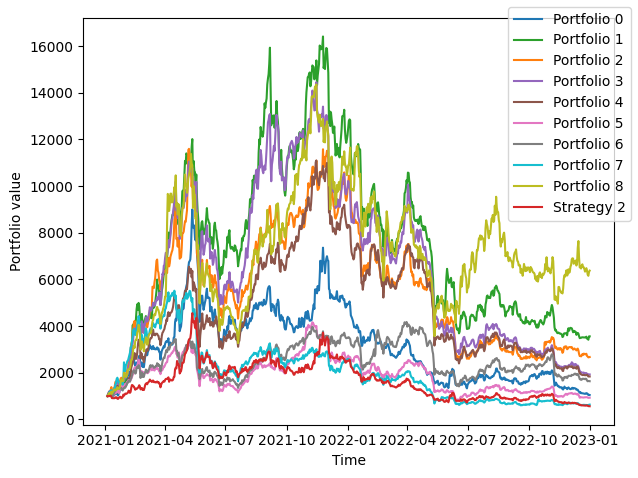

,Portfolio_0,Portfolio_1,Portfolio_2,Portfolio_3,Portfolio_4,Portfolio_5,Portfolio_6,Portfolio_7,Portfolio_8,Strategy 2
2022-12-28,1113.891267,3460.523495,2716.926233,1949.712393,1911.194358,950.359177,1664.674392,597.856001,6384.436472,597.634586
2022-12-29,1087.393416,3451.577839,2694.189095,1941.854937,1873.685901,936.228927,1633.180427,611.568589,6203.104919,585.522815
2022-12-30,1044.271465,3413.893422,2657.164904,1932.375158,1835.898349,920.909476,1643.543681,607.935932,6154.491863,564.266698
2022-12-31,1054.706926,3558.364279,2665.760486,1925.371913,1843.212470,928.551006,1643.562472,629.422324,6316.648830,568.467521
2023-01-01,1044.193908,3558.364279,2671.740244,1924.685200,1837.502144,927.196999,1635.633278,632.132684,6376.049604,562.838501


In [130]:

values2, returns2 = getPfAndPlot(df, 3)
values2.tail()

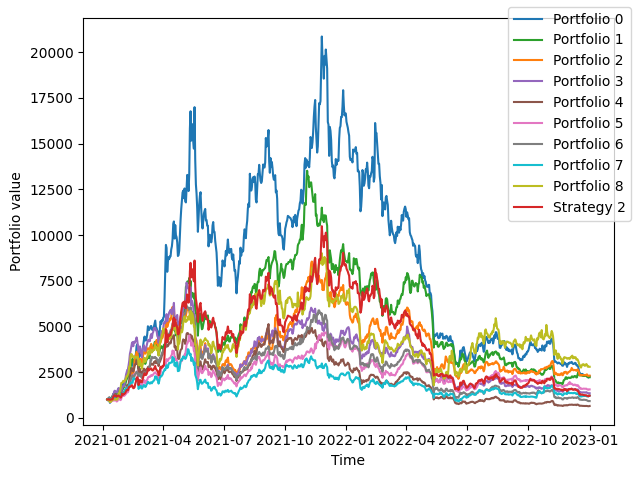

,Portfolio_0,Portfolio_1,Portfolio_2,Portfolio_3,Portfolio_4,Portfolio_5,Portfolio_6,Portfolio_7,Portfolio_8,Strategy 2
2022-12-28,2261.884179,2247.218984,2371.203424,1368.032914,639.076232,1556.205326,944.680424,1161.503091,2887.988947,1201.202663
2022-12-29,2233.824373,2237.692537,2300.111636,1354.330138,635.896953,1545.982647,920.946750,1195.974681,2790.604777,1189.548825
2022-12-30,2196.223559,2211.347058,2278.574305,1336.650989,627.769189,1529.977676,906.031521,1164.326659,2806.792486,1170.327068
2022-12-31,2291.271119,2215.213200,2293.726518,1342.022309,630.701479,1555.165440,914.731856,1213.827057,2784.313747,1218.435947
2023-01-01,2272.877481,2215.234771,2301.751789,1338.044804,641.702975,1548.919914,910.502302,1209.125692,2785.677979,1209.203619


In [131]:

rebalancing_dates = pd.date_range(start='2021-1-4', end = '2023-1-1', freq='W-THU')
v, r = getPfAndPlot(df, 3)
v.tail()

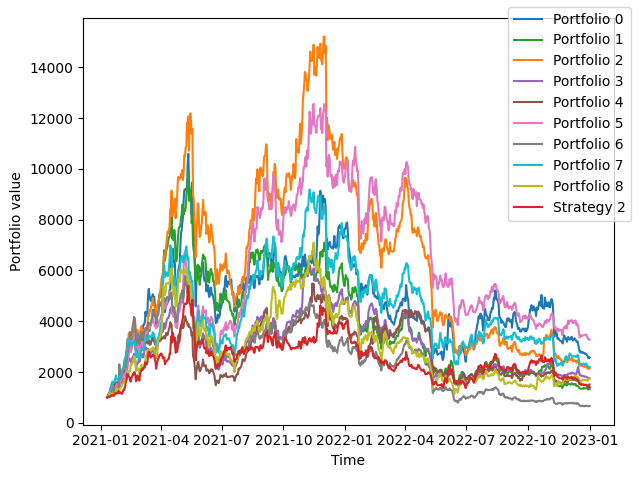

,Portfolio_0,Portfolio_1,Portfolio_2,Portfolio_3,Portfolio_4,Portfolio_5,Portfolio_6,Portfolio_7,Portfolio_8,Strategy 2
2022-12-28,2656.398299,1368.270927,2160.659124,1788.302977,1469.110590,3383.833602,668.097077,2246.833045,1669.919427,1450.284026
2022-12-29,2623.643295,1345.691966,2154.342237,1779.658472,1460.280592,3345.832643,655.257189,2222.111301,1645.844829,1435.627693
2022-12-30,2545.453746,1308.418856,2119.879919,1756.808445,1447.394734,3278.406527,650.104893,2181.226936,1690.535209,1393.337862
2022-12-31,2590.738087,1320.257429,2137.105263,1759.817076,1506.132421,3295.438346,651.340220,2201.688216,1744.907925,1412.092755
2023-01-01,2568.759702,1321.570243,2133.973244,1756.686072,1506.146134,3278.831468,662.262073,2194.197572,1742.787696,1401.255145


In [132]:

rebalancing_dates = pd.date_range(start='2021-1-11', end = '2023-1-1', freq='W-MON')
v, r = getPfAndPlot(df, 7)
v.tail()

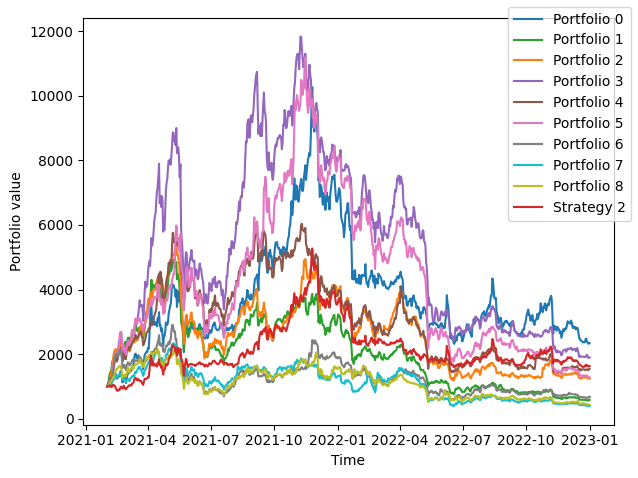

,Portfolio_0,Portfolio_1,Portfolio_2,Portfolio_3,Portfolio_4,Portfolio_5,Portfolio_6,Portfolio_7,Portfolio_8,Strategy 2
2022-12-28,2384.193634,567.942898,1271.323660,1984.072613,1534.633456,1335.857485,645.080025,399.432742,452.285301,1635.422462
2022-12-29,2366.544849,565.480506,1259.983535,1927.787521,1523.306387,1324.008945,658.435832,394.066911,436.033958,1639.661715
2022-12-30,2325.144116,563.246677,1243.435840,1882.994224,1501.580197,1288.629442,656.223843,391.137804,434.478696,1620.211546
2022-12-31,2349.214789,591.449843,1247.739410,1899.863119,1534.385808,1283.819294,683.622817,392.805004,430.395846,1635.528882
2023-01-01,2342.477829,591.449843,1242.977619,1899.863119,1546.796375,1279.603887,680.363310,391.401455,431.646648,1631.154944


In [133]:

rebalancing_dates = pd.date_range(start='2021-1-4', end = '2023-1-1', freq='MS')
v, r = getPfAndPlot(df, 21)
v.tail()

<h3> En conclusion sur les hyperparamètres du modèle (date de rebalancement et période de traitement) </h3> 

En rebalançant tous les lundis par rapport aux 3 derniers jours (càd le week-end), le portefeuille 1 obtient un rendement de 4% sur 2 ans, tandis que le dernier obtient un rendement de 537%.  
En tenant compte de la même période de 3 jours mais en rebalançant cette fois-ci le jeudi, le portefeuille 1 obtient une performance de 127% et le dernier de 178%. 
En rebalançant chaque semaine vis-à-vis des 7 derniers jours, c'est le 5ème portefeuille qui performe le mieux, et celui juste après qui performe le bien.  
En rebalançant tous les mois, mais vis-à-vis des performances des 3 dernières semaines, le portefeuille 1 obtient une rentabilité de 134% et le 2 de -41%.  
On a l'impression que la stratégie est très aléatoire et donc pas très digne de confiance. Les paramètres choisis dans l'énoncé (rebalancer tous les mois en se basant sur les 15 derniers jours pour construire les portefeuilles) sont plutôt bien choisis. 